1.Loading data into data frame


In [143]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [144]:
df =pd.read_csv(r'C:/Users/KIIT/Downloads/data.csv', parse_dates=[-1])

In [145]:
df.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


1.Dropping irrelevant columns


In [146]:
df=df.drop(['Engine Fuel Type','Transmission Type','Number of Doors',
'Market Category'],axis=1)

In [147]:
df.head(5)


,Make,Model,Year,Engine HP,Engine Cylinders,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,rear wheel drive,Compact,Convertible,28,18,3916,34500


3.Renaming columns

In [148]:
df=df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "TransmissionType": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "citympg": "MPG-C", "MSRP": "Price"})

In [149]:
df.shape

(11914, 12)

In [150]:
df.head(5)

,Make,Model,Year,HP,Cylinders,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,city mpg,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,rear wheel drive,Compact,Convertible,28,18,3916,34500


4.Dropping duplicate and missing values.

In [151]:
df.drop_duplicates(subset=None,keep='first', inplace=True)

In [152]:
df.shape

(11119, 12)

In [153]:
#drop rows and columns with all nan
df.dropna(axis=1,how="all", inplace=True)
df.dropna(axis=0,how="all", inplace=True)

In [154]:
df.shape

(11119, 12)

In [155]:
df.dtypes

Make              object
Model             object
Year               int64
HP               float64
Cylinders        float64
Drive Mode        object
Vehicle Size      object
Vehicle Style     object
MPG-H              int64
city mpg           int64
Popularity         int64
Price             object
dtype: object

5.Plotting of graphs to check outliers and removing those data points from dataset

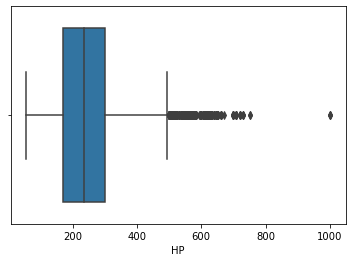

In [156]:
sns.boxplot(x=df['HP'])

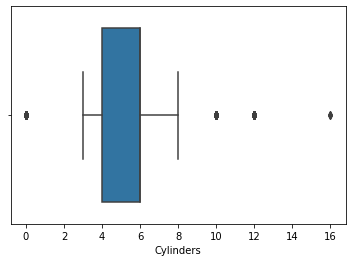

In [157]:
sns.boxplot(x=df['Cylinders'])

In [158]:
df['Price']=df['Price'].astype(int)

In [159]:
df.dtypes

Make              object
Model             object
Year               int64
HP               float64
Cylinders        float64
Drive Mode        object
Vehicle Size      object
Vehicle Style     object
MPG-H              int64
city mpg           int64
Popularity         int64
Price              int32
dtype: object

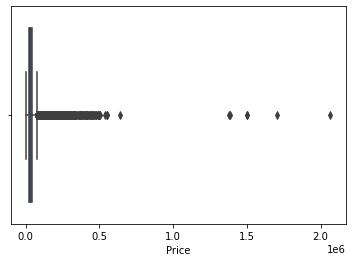

In [160]:
sns.boxplot(x=df['Price'])

In [161]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.0
HP              131.0
Cylinders         2.0
MPG-H             8.0
city mpg          6.0
Popularity     1460.0
Price         21397.5
dtype: float64


In [162]:
df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [163]:
df.shape

(8575, 12)

6.Most represented car brands of dataset and average of their price.

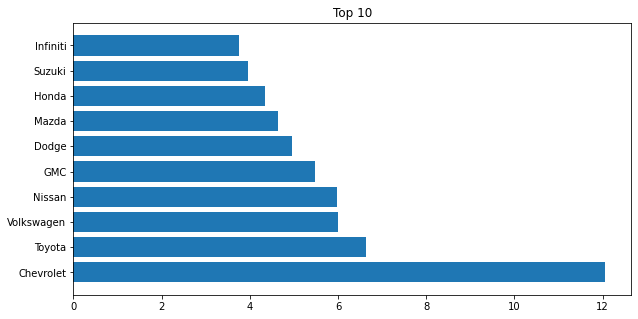

In [164]:
#carband percentage
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())
popular_labels=counts.index[:10]
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title("Top 10")
plt.show()

In [165]:
prices=df[['Make','Price']].loc[(df['Make']=='Chervolet')|(df['Make']=='Ford')|(df['Make']=='Toyota')|(df['Make']=='Volkswagen')|(df['Make']=='Nissan')|(df['Make']=='GMC')|(df['Make']=='Dodge')|(df['Make']=='Mazda')|(df['Make']=='Honda')|(df['Make']=='Suzuki')|(df['Make']=='Infiniti')].groupby('Make').mean()

In [166]:
print(prices)

                   Price
Make                    
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Infiniti    43127.822981
Mazda       20830.670025
Nissan      28352.543860
Suzuki      18168.241888
Toyota      27769.421793
Volkswagen  29032.817476


7.Plotting Of Correlation Matrix 



In [167]:
corrMatrix=df.corr()

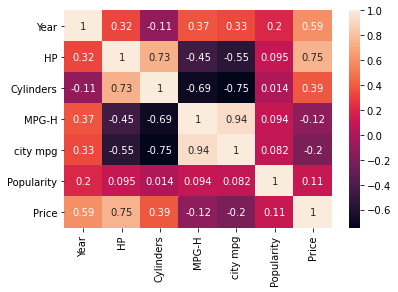

In [168]:
sns.heatmap(corrMatrix,annot=True)
plt.show()

In [169]:
df.dtypes


Make              object
Model             object
Year               int64
HP               float64
Cylinders        float64
Drive Mode        object
Vehicle Size      object
Vehicle Style     object
MPG-H              int64
city mpg           int64
Popularity         int64
Price              int32
dtype: object

In [170]:
df=df.drop(['HP','Cylinders'],axis=1)

9.Implementing Linear Regression Model

In [140]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [141]:
y=df.Price.values
X = df.drop(['Make','Model','Drive Mode','Vehicle Size','Vehicle Style','Price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Splitting the data into training and testing data 
regressor = LinearRegression() 
  
regressor.fit( X_train, y_train, sample_weight=None)

LinearRegression()

In [142]:
print(regressor.score(X_test, y_test,)) 

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

0.5306878977992292
-3471211.3451541318
[ 1.75541583e+03  4.81082348e+02 -2.12148375e+03  2.99392891e-02]
      Actual     Predicted
0      39020  36341.872604
1      34815  52084.395161
2      27230  30747.551319
3      40800  33770.295991
4      38900  40274.806207
...      ...           ...
1710   37080  35949.698782
1711   67050  44833.804653
1712    4287  18480.440954
1713   47570  44363.470510
1714   63570  42558.099491

[1715 rows x 2 columns]
